# Start Point of Analysis of Latents

In [1]:
from importlib import reload

import os
import numpy as np

import pandas
import xarray
import h5py

from matplotlib import pyplot as plt
import matplotlib.tri as tri
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo import plotting
from ulmo.llc import io as llc_io
from ulmo.utils import image_utils
from ulmo.analysis import figures as ulmo_figs

In [2]:
### Read table
tbl_file = '/home/erdong/ulmos/modis_l2/MODIS_L2_std.feather'
llc_table = ulmo_io.load_main_table(tbl_file)

Read main table: /home/erdong/ulmos/modis_l2/MODIS_L2_std.feather


In [3]:
### print the column name list of the table
columns_table = llc_table.columns
print(columns_table.values)

['lat' 'lon' 'col' 'datetime' 'LL' 'row' 'clear_fraction'
 'mean_temperature' 'Tmin' 'Tmax' 'T90' 'T10' 'filename' 'UID' 'pp_file'
 'pp_root' 'field_size' 'pp_type' 'pp_idx']


In [4]:
### print the shape of the table
sample_size, num_features = llc_table.shape
print('Sample size is: ', sample_size)
print('Num of features: ', num_features)

Sample size is:  12493761
Num of features:  19


In [5]:
### Show part of the table to get a feel
num_lines = 100
llc_table.head(num_lines)

,lat,lon,col,datetime,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,filename,UID,pp_file,pp_root,field_size,pp_type,pp_idx
0,13.980967,62.675774,517,2003-03-10 21:25:00,520.178711,304,0.000000,26.199476,25.250000,26.885000,26.474998,25.814999,AQUA_MODIS.20030310T212506.L2.SST.nc,1047103981024267577,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,0
1,13.043748,-102.751816,706,2003-12-12 08:30:00,432.766724,1696,0.049805,28.924648,27.789999,29.654999,29.154999,28.695000,AQUA_MODIS.20031212T083006.L2.SST.nc,107110304377724818,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,1
2,-18.086618,40.844833,581,2003-09-24 22:35:00,764.413086,656,0.006104,25.551611,24.775000,26.154999,25.750000,25.344999,AQUA_MODIS.20030924T223506.L2.SST.nc,106471913422084483,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,2
3,39.071575,18.569141,1028,2003-05-01 01:05:00,371.310120,898,0.049988,16.414951,15.160000,17.205000,16.725000,16.080000,AQUA_MODIS.20030501T010506.L2.SST.nc,1051129071619856914,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,3
4,17.901926,90.155480,997,2003-12-05 19:55:00,-214.759277,1520,0.035461,26.744499,24.975000,28.724998,27.824999,25.830000,AQUA_MODIS.20031205T195506.L2.SST.nc,1070107901927015548,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,28.401287,-45.495354,485,2003-08-10 04:45:00,283.588318,528,0.046814,27.789036,26.730000,28.545000,28.170000,27.410000,AQUA_MODIS.20030810T044506.L2.SST.nc,1060118401313450465,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,95
96,39.676930,12.912404,261,2003-07-15 00:45:00,406.291748,1616,0.000061,27.372808,26.480000,28.349998,27.789999,27.000000,AQUA_MODIS.20030715T004506.L2.SST.nc,1058129676919291240,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,96
97,68.270500,-11.948500,632,2003-04-12 03:45:00,83.249451,402,0.048401,0.972715,0.185000,2.245000,1.590000,0.405000,AQUA_MODIS.20030412T034505.L2.SST.nc,1050158270516805150,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,97
98,12.504951,94.380860,206,2003-04-26 19:00:00,125.835571,1648,0.048157,30.507929,29.045000,32.594997,30.894999,30.105000,AQUA_MODIS.20030426T190006.L2.SST.nc,1051102505027438086,s3://modis-l2/PreProc/MODIS_R2019_2003_95clear...,standard,128,0,98


In [6]:
### Let's show the basic information of this table
llc_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12493761 entries, 0 to 12493760
Data columns (total 19 columns):
 #   Column            Dtype         
---  ------            -----         
 0   lat               float64       
 1   lon               float64       
 2   col               int64         
 3   datetime          datetime64[ns]
 4   LL                float64       
 5   row               int64         
 6   clear_fraction    float64       
 7   mean_temperature  float64       
 8   Tmin              float64       
 9   Tmax              float64       
 10  T90               float64       
 11  T10               float64       
 12  filename          object        
 13  UID               int64         
 14  pp_file           object        
 15  pp_root           object        
 16  field_size        int64         
 17  pp_type           int64         
 18  pp_idx            int64         
dtypes: datetime64[ns](1), float64(9), int64(6), object(3)
memory usage: 1.8+ GB


In [7]:
### Let's show the basic statistics of the columns
llc_table.describe()

,lat,lon,col,LL,row,clear_fraction,mean_temperature,Tmin,Tmax,T90,T10,UID,field_size,pp_type,pp_idx
count,1.249376e+07,1.249376e+07,1.249376e+07,1.235805e+07,1.249376e+07,1.249376e+07,1.249376e+07,1.249376e+07,1.249376e+07,1.249376e+07,1.249376e+07,1.249376e+07,12493761.0,1.249376e+07,1.249376e+07
mean,3.826659e+00,1.259687e+01,5.967771e+02,2.279246e+02,9.593971e+02,2.713612e-02,2.218384e+01,2.042456e+01,2.342694e+01,2.274265e+01,2.160190e+01,5.778429e+17,128.0,1.086238e-02,3.619094e+05
std,2.943509e+01,9.402384e+01,2.318401e+02,2.348675e+02,5.546863e+02,2.019032e-02,6.870082e+00,6.913104e+00,6.777832e+00,6.796110e+00,6.954926e+00,5.934674e+17,0.0,1.036552e-01,2.134485e+05
min,-7.790454e+01,-1.800000e+02,1.970000e+02,-1.071019e+04,0.000000e+00,0.000000e+00,-1.002009e+00,-1.800000e+00,-4.850000e-01,-6.700000e-01,-1.640000e+00,1.569636e+10,128.0,0.000000e+00,0.000000e+00
25%,-2.019826e+01,-6.434418e+01,3.890000e+02,9.366748e+01,4.760000e+02,4.882812e-03,1.905094e+01,1.722500e+01,2.046000e+01,1.970500e+01,1.837000e+01,1.189732e+17,128.0,0.000000e+00,1.757480e+05
50%,1.062094e+01,2.489467e+01,5.870000e+02,2.400111e+02,9.600000e+02,2.905273e-02,2.460586e+01,2.273000e+01,2.584500e+01,2.517500e+01,2.400500e+01,1.460707e+17,128.0,0.000000e+00,3.594800e+05
75%,2.537032e+01,8.848407e+01,8.050000e+02,3.813147e+02,1.440000e+03,4.895020e-02,2.710563e+01,2.545000e+01,2.821500e+01,2.757500e+01,2.663000e+01,1.231110e+18,128.0,0.000000e+00,5.432350e+05
max,8.641106e+01,1.799999e+02,1.028000e+03,1.060516e+03,1.911000e+03,4.998779e-02,3.269627e+01,3.190500e+01,3.300000e+01,3.292500e+01,3.242500e+01,1.577153e+18,128.0,1.000000e+00,7.700080e+05


### We would like to focus on the 'LL' column. Here we found that the range of the LL is actually
### the whole real line (we mean that the LL can be negative and also positive), so as a first step
### of exploration, we can explain the 'LL' as the log odds, so we can use the sigmoid function
### to transform the 'LL' to the 'Probability' space as first try of this dataset.

In [8]:
### At first, let's check if there is any missing data, actually yes
missing_table = llc_table.isnull().sum()
print(missing_table)

lat                      0
lon                      0
col                      0
datetime                 0
LL                  135712
row                      0
clear_fraction           0
mean_temperature         0
Tmin                     0
Tmax                     0
T90                      0
T10                      0
filename                 0
UID                      0
pp_file                  0
pp_root                  0
field_size               0
pp_type                  0
pp_idx                   0
dtype: int64


### From the missing table, we know that there are missing data in LL (negative log likelihood) column. To filling the
### missing data, we have two methods:
* Filling the missing data with mean, mode, etc.
* Discretize the specific feature with missing data (here is LL)

### We will use the maximum to fill all the missing data according to our understanding of this problem.


In [9]:
### Filling missing data of table
### Get the maximum of 'LL' column of table at first
max_ll = llc_table['LL'].max()
print(max_ll)

1060.5155029296875


In [10]:
### Continue of above
llc_table_filled = llc_table.fillna(max_ll)
print('num of null in filled table is: ', llc_table_filled.isnull().any().sum())

num of null in filled table is:  0


In [11]:
### Let's do the sigmoid transformation (just a try, actually decoder will learn a better map)
ll = llc_table_filled['LL']
prob_column = (1. / (1 + np.exp(-1 * ll))).copy()
#prob_column.rename(columns = {'LL': 'prob'})
prob_column.describe()

/home/erdong/PycharmProjects/ulmo/venv_conda/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.249376e+07
mean     8.611543e-01
std      3.444680e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: LL, dtype: float64

### As shown above, now the transformed 'LL' column with the new name as 'porb_column' is in
### the right range, namely the probability range


In [12]:
### add the 'prob' to the 'llc_table_filled' table
llc_table_filled['prob'] = prob_column
#llc_table_filled.describe()

### Okay, as we got the probability, we can plot the distribution of the 'position'
### namely '(lat, lon)'. Here we choose the 'contour' plot to do visualization
### However, since the space is continuous, we will use the density instead of the
### probability to represent 'hight', so let's just use the exponential function to
### transform the 'll' to 'density'

In [13]:
### exponential transformation
#prob_density_pos = np.exp(ll)
#prob_density_neg = np.exp(-ll)
#print(prob_density_pos.describe())
#print(prob_density_neg.describe())

In [14]:
### Let's plot the contour
### At first, study the 'lat' and 'long' columns
lat_column = llc_table_filled['lat']
lon_column = llc_table_filled['lon']
print(lat_column.describe())
print(lon_column.describe())

count    1.249376e+07
mean     3.826659e+00
std      2.943509e+01
min     -7.790454e+01
25%     -2.019826e+01
50%      1.062094e+01
75%      2.537032e+01
max      8.641106e+01
Name: lat, dtype: float64
count    1.249376e+07
mean     1.259687e+01
std      9.402384e+01
min     -1.800000e+02
25%     -6.434418e+01
50%      2.489467e+01
75%      8.848407e+01
max      1.799999e+02
Name: lon, dtype: float64


In [26]:
### fix the seed
seed = 314
np.random.seed(seed)
### prepare the grid
lat_min, lat_max = lat_column.min(), lat_column.max()
lon_min, lon_max = lon_column.min(), lon_column.max()
print('min of lat is: ', lat_min)
print('max of lat is: ', lat_max)
print('min of lon is: ', lon_min)
print('max of lon is: ', lon_max)
### The above result is reasonable since polar coordinate on a sphere is
### used.
num_lat = 600
num_lon = 5000
lat_grid = np.linspace(lat_min, lat_max, num_lat)
lon_grid = np.linspace(lon_min, lon_max, num_lon)
Lat_grid, Lon_grid = np.meshgrid(lat_grid, lon_grid)

min of lat is:  -76.82795
max of lat is:  84.95793
min of lon is:  -179.99525
max of lon is:  179.99963


In [46]:
### We will do linear interpolation (it is not good but we use it here
### for a quick try)
### Since it is too computation expensive, we will sample from the
### 'llc_table_filled'
llc_table_subsample = llc_table_filled.sample(frac=1/2, random_state=seed)
lat_column = llc_table_subsample['lat']
lon_column = llc_table_subsample['lon']
prob_column = llc_table_subsample['prob']
triang = tri.Triangulation(lon_column, lat_column)
interpolator = tri.LinearTriInterpolator(triang, prob_column)
prob_grid =  interpolator(Lon_grid, Lat_grid)
print(prob_grid.shape)

(5000, 600)


<ipython-input-47-8c4dbfa16bff>:3: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(Lon_grid, Lat_grid, prob_grid, levels=14, color='k')


Text(0.5, 1.0, 'Countour plot of density')

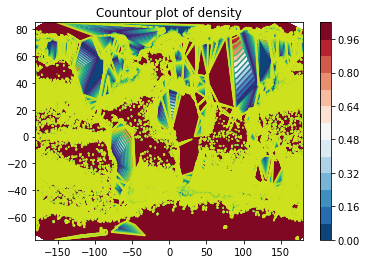

In [47]:
### plot the contour graph
fig = plt.figure()
plt.contour(Lon_grid, Lat_grid, prob_grid, levels=14, color='k')
cntr = plt.contourf(Lon_grid, Lat_grid, prob_grid, levels=14, cmap='RdBu_r')
fig.colorbar(cntr)
plt.title('Countour plot of density')
#plt.savefig('./density_plot.pdf')